# Étude à réaliser sur MNIST

In [1]:
from principal_RBM_MNIST import *
from principal_DNN_MNIST import *

/Users/zakariatozy/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelBinarizer
import numpy as np

def download_mnist():
    if os.path.exists('mnist_784.npz'):
        return
    mnist = fetch_openml('mnist_784')
    X = mnist['data'].values
    X[X < 127] = 0 
    X[X >= 127] = 1
    y = mnist['target']
    y = LabelBinarizer().fit_transform(y)

    np.savez('mnist_784.npz', X=X, y=y)

def get_mnist(train_size, test_size):
    download_mnist()
    with np.load('mnist_784.npz') as data:
        X, y = data['X'], data['y']

    X_train, X_test = X[:train_size], X[train_size:train_size+test_size]
    y_train, y_test = y[:train_size], y[train_size:train_size+test_size]

    return X_train, X_test, y_train, y_test


## PROGRAMME

In [3]:
# GET THE DATA READY
X_train, X_test, y_train, y_test = get_mnist(50000,20000)
# Number of epoch for pretraining
num_epochs_pretraining= 100
# Number of epoch for tuning
num_epochs_training = 200
# Learning rate
learning_rate=0.1
# Batch size
batch_size = 100
# Number of features
p = 28*28
# Number of classes 
nbr_classes = y_train.shape[1]

In [5]:
X_train.shape, X_test.shape

Pretraining ================================


Training RMB: 100%|██████████| 100/100 [09:38<00:00,  5.78s/it, loss pretraining=0.105]


Fine Tuning ===================================


Retropopagation: 100%|██████████| 200/200 [20:50<00:00,  6.25s/it, loss retropagation=0.0139]


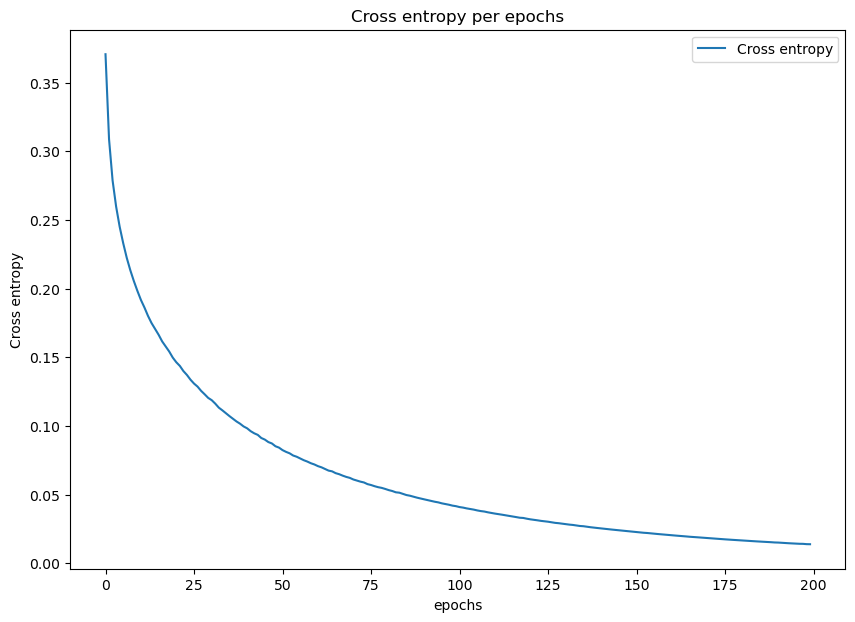

Retropopagation: 100%|██████████| 200/200 [22:29<00:00,  6.75s/it, loss retropagation=0.00296]


In [5]:
hidden_units = [200, 200]

dnn = init_DNN(p, hidden_units, nbr_classes)
print("Pretraining ================================")
dnn_pretrain = pretrain_DNN(dnn, X_train, epochs=num_epochs_pretraining, learning_rate=learning_rate, batch_size=batch_size)
print("Fine Tuning ===================================")
dnn_fine_tune, loss = retropropagation(dnn, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train, display=True)

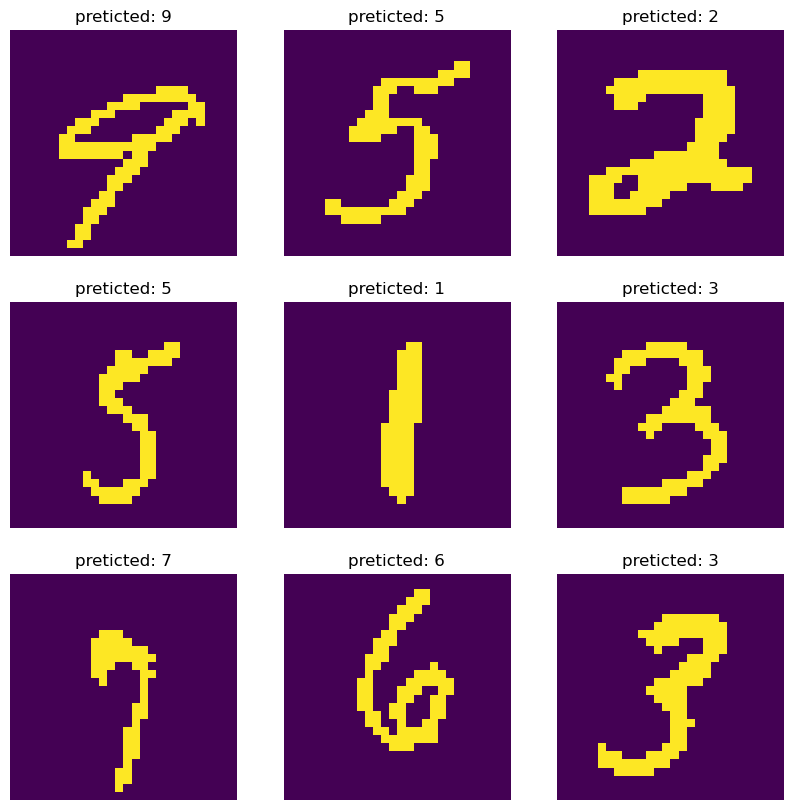

 ====================  Observerd Probaility for each sample - pretrained model ====================


,0,1,2,3,4,5,6,7,8,9
sample_[1],3.034552e-07,7.128587e-06,1.158638e-07,3.212450e-07,3.974746e-03,8.392538e-07,9.301351e-09,7.929600e-03,1.549223e-04,9.879320e-01
sample_[2],6.985377e-06,7.934431e-08,1.038894e-07,4.317082e-05,1.744151e-08,9.998399e-01,1.010139e-06,1.487322e-06,2.037659e-06,1.052520e-04
sample_[3],8.226394e-09,5.550377e-13,9.999982e-01,1.734533e-06,1.457626e-11,1.836959e-13,5.827960e-13,4.523378e-08,1.039946e-08,8.018960e-11
sample_[4],7.504620e-07,2.175976e-05,9.438244e-08,6.403715e-05,2.756147e-08,9.998910e-01,2.888146e-06,1.666925e-07,6.828071e-06,1.248079e-05
sample_[5],4.656471e-12,9.997671e-01,2.562073e-07,1.198857e-05,1.403664e-06,3.002750e-10,2.926551e-07,1.605825e-04,5.816870e-05,1.950435e-07
sample_[6],6.526434e-09,3.524890e-07,2.970598e-08,9.992268e-01,1.643239e-09,2.881466e-06,2.799060e-12,2.518026e-06,9.242736e-05,6.750050e-04
sample_[7],1.969117e-07,1.945903e-04,1.967125e-06,5.485911e-05,3.767057e-05,1.869288e-04,6.259350e-09,9.979174e-01,1.968429e-09,1.606384e-03
sample_[8],9.048175e-09,9.204240e-07,4.778937e-07,2.576974e-08,3.851584e-05,3.642316e-07,9.999594e-01,2.651258e-07,6.355646e-09,5.722019e-09
sample_[9],1.780719e-10,1.483279e-07,2.645256e-07,9.999983e-01,4.739493e-12,4.537411e-07,9.608583e-14,3.646918e-08,1.160960e-07,6.604594e-07


In [8]:
# Output probability of random images 
random_samples = np.random.randint(0, len(X_test), size=9)
output_proba = entree_sortie_reseau(dnn_fine_tune, X_test[random_samples, :])[-1]

output_label = output_proba.argmax(axis=1)

plt.figure(figsize=(10,10))
for i,j in enumerate(random_samples):
    plt.subplot(3,3, i+1)
    plt.imshow(X_test[j].reshape(28,28))
    plt.title(f"preticted: {output_label[i]}")
    plt.axis('off')

plt.show()

import pandas as pd
print(" ====================  Observerd Probaility for each sample - pretrained model ====================")
pd.DataFrame(output_proba, index=[f"sample_[{i+1}]" for i in range(len(output_proba))])

In [10]:
#fine tuning with random weights
dnn_random = init_DNN(p, hidden_units, nbr_classes)
dnn_random_tune,loss = retropropagation(dnn_random, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train, display=False)

Retropopagation: 100%|██████████| 200/200 [25:30<00:00,  7.65s/it, loss retropagation=0.00302]


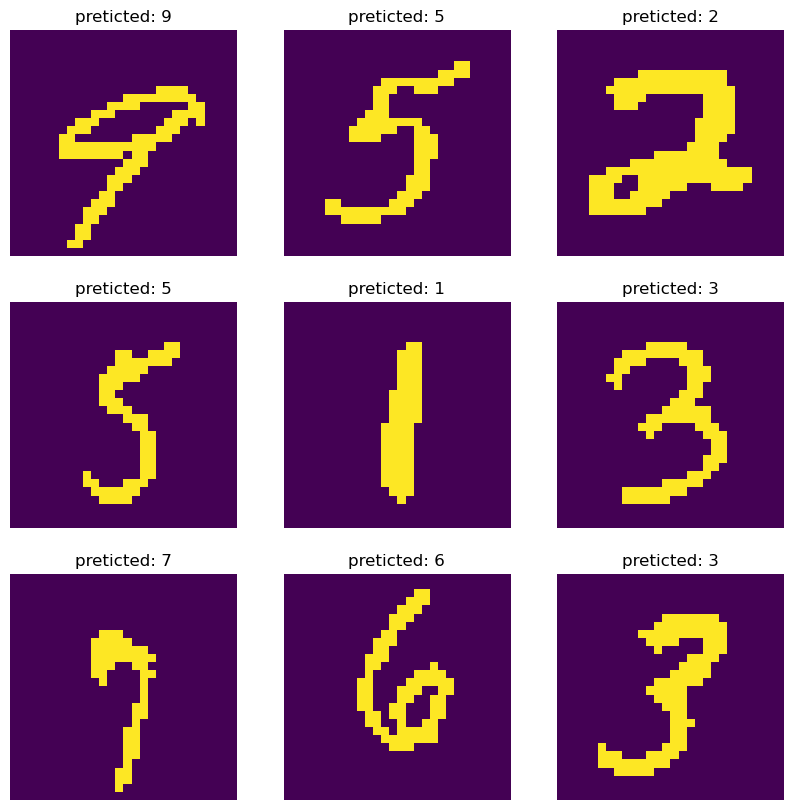

 ====================  Observerd Probaility for each sample - random model ====================


,0,1,2,3,4,5,6,7,8,9
sample_[1],2.449095e-08,1.117544e-09,2.025232e-11,4.211512e-09,8.156937e-07,9.127432e-08,1.103485e-13,5.406271e-06,4.342439e-06,9.999893e-01
sample_[2],4.563496e-07,1.034830e-06,4.679010e-09,4.476038e-07,2.181910e-05,9.999078e-01,1.017301e-06,6.590874e-08,2.007362e-07,6.712765e-05
sample_[3],7.937804e-08,5.432527e-12,9.999929e-01,1.529171e-06,4.028320e-13,5.003377e-16,4.654166e-13,5.488877e-06,1.168691e-09,1.384837e-12
sample_[4],1.590930e-10,4.027764e-08,6.030750e-14,1.658468e-07,9.124902e-14,9.999995e-01,1.772343e-12,6.867839e-13,2.389915e-08,2.521565e-07
sample_[5],3.409093e-10,9.999197e-01,3.219156e-07,1.245785e-06,2.730770e-07,8.804490e-09,6.015521e-05,8.856388e-06,9.419057e-06,2.163238e-08
sample_[6],3.145405e-11,2.382692e-10,5.258406e-10,9.999998e-01,6.443614e-13,1.829703e-09,2.775316e-15,1.279009e-08,3.761917e-09,1.336040e-07
sample_[7],6.617081e-10,4.398367e-04,2.761548e-08,4.000375e-05,2.902668e-10,1.243553e-06,1.389447e-12,9.994532e-01,2.523194e-11,6.565540e-05
sample_[8],3.490877e-10,3.240006e-06,6.106098e-09,5.281909e-11,1.572541e-07,1.213970e-08,9.999966e-01,1.695749e-10,4.042901e-09,1.571845e-10
sample_[9],2.736395e-14,2.348920e-08,3.870998e-12,9.999999e-01,8.960682e-16,2.140577e-09,9.898024e-19,1.839403e-09,6.548627e-09,8.575779e-08


In [12]:
# Output probability of random images 
output_proba = entree_sortie_reseau(dnn_random_tune, X_test[random_samples, :])[-1]

output_label = output_proba.argmax(axis=1)

plt.figure(figsize=(10,10))
for i,j in enumerate(random_samples):
    plt.subplot(3,3, i+1)
    plt.imshow(X_test[j].reshape(28,28))
    plt.title(f"preticted: {output_label[i]}")
    plt.axis('off')

plt.show()

import pandas as pd
print(" ====================  Observerd Probaility for each sample - random model ====================")
pd.DataFrame(output_proba, index=[f"sample_[{i+1}]" for i in range(len(output_proba))])

## TAUX D'ERREUR EN FONCTION DU NOMBRE DE COUCHES

In [7]:
# Load MNIST dataset
X_train, X_test, y_train, y_test = get_mnist(train_size=10000, test_size=5000)

# Set number of epochs for pretraining and training
num_epochs_pretraining = 100
num_epochs_training = 200

# Set learning rate
learning_rate = 0.1

# Set batch size
batch_size = 100

# Set input dimension
input_dim = 28*28

# Set number of classes
num_classes = y_train.shape[1]

# Define hidden layer unit configurations
hidden_layer_units = [(200, 200), (200, 200, 200), (200, 200, 200, 200), (200, 200, 200, 200, 200), (200, 200, 200, 200, 200, 200), (200, 200, 200, 200, 200, 200, 200)]

# Initialize empty lists to store training history for each configuration
result = {}
result["random_loss"] = []
result["pretrain_loss"] = []
result["random_acc"] = []
result["pretrain_acc"] = []

# Loop through each hidden layer configuration
for hidden_units in hidden_layer_units:
    print(f"hidden_units : {hidden_units}")
    # Initialize DNN with given input dimension, hidden layer units, and number of classes at random
    dnn_random = init_DNN(input_dim, hidden_units, num_classes)
    
    # Pretrain DNN with given number of epochs, learning rate, and batch size
    dnn_pretrain = pretrain_DNN(init_DNN(input_dim, hidden_units, num_classes), X_train, epochs=num_epochs_pretraining, learning_rate=learning_rate, batch_size=batch_size)
    
    # Fine tune DNN random and pretrain with given number of epochs, learning rate, and batch size, and store training history
    print("Retropagation model random =====================================")
    dnn_random_tune, train_loss = retropropagation(dnn_random, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    print("Retropagation model pretrain =====================================")
    dnn_pretrain_tune, train_loss = retropropagation(dnn_pretrain, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    
    
    # Compute test loss and accuracy for each case   
    print("Test model pretrain =====================================")
    test_loss_pretrain, acc_test_pretrain = test_DNN(dnn_pretrain_tune, X_test, y_test)
    print("Test model random =====================================")
    test_loss_random, acc_test_random = test_DNN(dnn_random_tune, X_test, y_test)
    
    # Store the result
    result["random_loss"].append(test_loss_random)
    result["pretrain_loss"].append(test_loss_pretrain)
    result["random_acc"].append(acc_test_random)
    result["pretrain_acc"].append(acc_test_pretrain)

hidden_units : (200, 200)


Training RMB: 100%|██████████| 100/100 [01:59<00:00,  1.19s/it, loss pretraining=0.109]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [03:50<00:00,  1.15s/it, loss retropagation=0.0199]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [03:32<00:00,  1.06s/it, loss retropagation=0.0328]


Test model pretrain =====================================
Test loss: 0.21315499641390614, Acc. %: 93.94%
Test model random =====================================
Test loss: 0.27879330758410187, Acc. %: 92.5%
hidden_units : (200, 200, 200)


Training RMB: 100%|██████████| 100/100 [01:58<00:00,  1.19s/it, loss pretraining=0.105]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [05:33<00:00,  1.67s/it, loss retropagation=0.0109]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [04:49<00:00,  1.45s/it, loss retropagation=0.0241]


Test model pretrain =====================================
Test loss: 0.20037760048134254, Acc. %: 94.6%
Test model random =====================================
Test loss: 0.2858737706930899, Acc. %: 92.72%
hidden_units : (200, 200, 200, 200)


Training RMB: 100%|██████████| 100/100 [01:54<00:00,  1.14s/it, loss pretraining=0.139]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [07:38<00:00,  2.29s/it, loss retropagation=0.00525]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [07:11<00:00,  2.16s/it, loss retropagation=0.0177]


Test model pretrain =====================================
Test loss: 0.19950623898373498, Acc. %: 94.69999999999999%
Test model random =====================================
Test loss: 0.3116417604240169, Acc. %: 93.14%
hidden_units : (200, 200, 200, 200, 200)


Training RMB:  99%|█████████▉| 99/100 [02:13<00:01,  1.27s/it, loss pretraining=0.106]

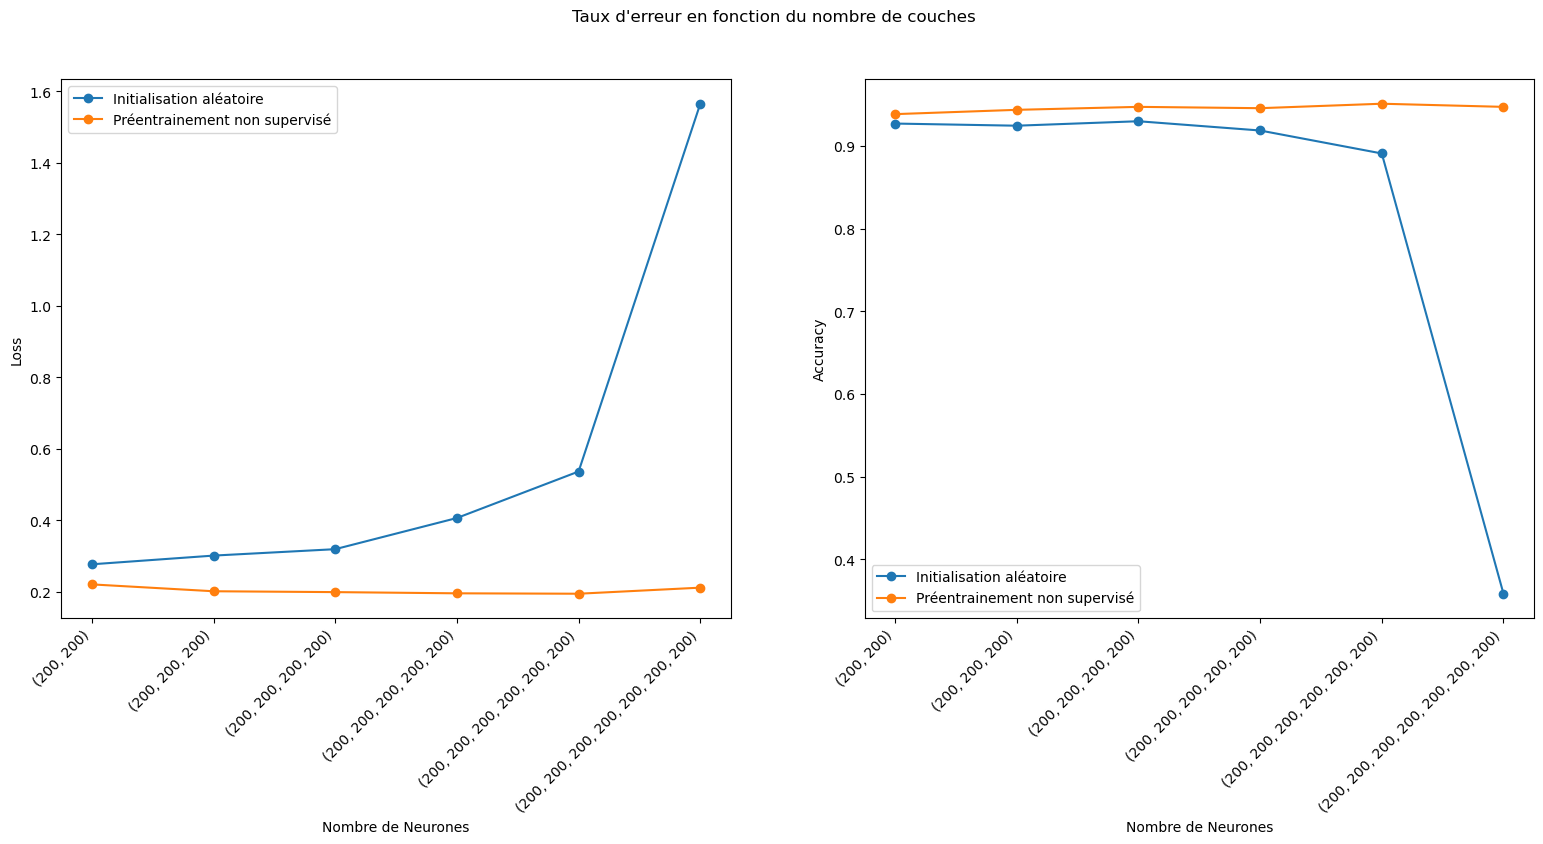

In [10]:
X_range = range(len(hidden_layer_units))

fig, axs = plt.subplots(1, 2, figsize=(19,7))
fig.suptitle("Taux d'erreur en fonction du nombre de couches")

axs[0].plot(X_range, result["random_loss"],"o-", label='Initialisation aléatoire')
axs[0].plot(X_range, result["pretrain_loss"], "o-", label = "Préentrainement non supervisé")
axs[0].set_xlabel("Nombre de Neurones")
axs[0].set_ylabel("Loss")
axs[0].set_xticks(X_range)
axs[0].set_xticklabels(hidden_layer_units, rotation=45, ha="right")
axs[0].legend()

axs[1].plot(X_range, result["random_acc"], "o-", label='Initialisation aléatoire')
axs[1].plot(X_range, result["pretrain_acc"], "o-", label = "Préentrainement non supervisé")
axs[1].set_xlabel("Nombre de Neurones")
axs[1].set_ylabel("Accuracy")
axs[1].set_xticks(X_range)
axs[1].set_xticklabels(hidden_layer_units, rotation=45, ha="right")
axs[1].legend()

plt.show()


## TAUX D'ERREUR EN FONCTION DU NOMBRE DE NEURONES

In [12]:
# Load MNIST dataset
X_train, X_test, y_train, y_test = get_mnist(train_size=50000, test_size=20000)

# Define hidden layer unit configurations
hidden_layer_units = [(200, 200), (300, 300), (400, 400), (500, 500), (600, 600), (700, 700)]

# Initialize empty lists to store training history for each configuration
result = {}
result["random_loss"] = []
result["pretrain_loss"] = []
result["random_acc"] = []
result["pretrain_acc"] = []


# Loop through each hidden layer configuration
for hidden_units in hidden_layer_units:
    print(f"hidden_units : {hidden_units}")
    # Initialize DNN with given input dimension, hidden layer units, and number of classes at random
    dnn_random = init_DNN(input_dim, hidden_units, num_classes)
    
    # Pretrain DNN with given number of epochs, learning rate, and batch size
    dnn_pretrain = pretrain_DNN(init_DNN(input_dim, hidden_units, num_classes), X_train, epochs=num_epochs_pretraining, learning_rate=learning_rate, batch_size=batch_size)
    
    # Fine tune DNN random and pretrain with given number of epochs, learning rate, and batch size, and store training history
    print("Retropagation model random =====================================")
    dnn_random_tune, train_loss = retropropagation(dnn_random, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    print("Retropagation model pretrain =====================================")
    dnn_pretrain_tune, train_loss = retropropagation(dnn_pretrain, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    
    
    # Compute test loss and accuracy for each case   
    print("Test model pretrain =====================================")
    test_loss_pretrain, acc_test_pretrain = test_DNN(dnn_pretrain_tune, X_test, y_test)
    print("Test model random =====================================")
    test_loss_random, acc_test_random = test_DNN(dnn_random_tune, X_test, y_test)
    
    # Store the result
    result["random_loss"].append(test_loss_random)
    result["pretrain_loss"].append(test_loss_pretrain)
    result["random_acc"].append(acc_test_random)
    result["pretrain_acc"].append(acc_test_pretrain)

hidden_units : (200, 200)


Training RMB: 100%|██████████| 100/100 [10:19<00:00,  6.19s/it, loss pretraining=0.103]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [20:15<00:00,  6.08s/it, loss retropagation=0.00291]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [18:43<00:00,  5.62s/it, loss retropagation=0.0133]


Test model pretrain =====================================
Test loss: 0.09380152065597415, Acc. %: 97.33000000000001%
Test model random =====================================
Test loss: 0.10367979593475384, Acc. %: 97.315%
hidden_units : (300, 300)


Training RMB: 100%|██████████| 100/100 [13:57<00:00,  8.38s/it, loss pretraining=0.11]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [27:08<00:00,  8.14s/it, loss retropagation=0.00281]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [25:20<00:00,  7.60s/it, loss retropagation=0.0084] 


Test model pretrain =====================================
Test loss: 0.0873087946163328, Acc. %: 97.52499999999999%
Test model random =====================================
Test loss: 0.10713270270385633, Acc. %: 97.26%
hidden_units : (400, 400)


Training RMB: 100%|██████████| 100/100 [20:34<00:00, 12.35s/it, loss pretraining=0.118]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [36:59<00:00, 11.10s/it, loss retropagation=0.00278]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [34:06<00:00, 10.23s/it, loss retropagation=0.00623]


Test model pretrain =====================================
Test loss: 0.07812853824734355, Acc. %: 97.795%
Test model random =====================================
Test loss: 0.10480360302939125, Acc. %: 97.345%
hidden_units : (500, 500)


Training RMB: 100%|██████████| 100/100 [23:22<00:00, 14.03s/it, loss pretraining=0.122]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [42:25<00:00, 12.73s/it, loss retropagation=0.00275]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [41:22<00:00, 12.41s/it, loss retropagation=0.00493]


Test model pretrain =====================================
Test loss: 0.07480118989858722, Acc. %: 97.81%
Test model random =====================================
Test loss: 0.10322685490261352, Acc. %: 97.44500000000001%
hidden_units : (600, 600)


Training RMB: 100%|██████████| 100/100 [28:36<00:00, 17.17s/it, loss pretraining=0.125]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [52:13<00:00, 15.67s/it, loss retropagation=0.00278]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [46:55<00:00, 14.08s/it, loss retropagation=0.0041] 


Test model pretrain =====================================
Test loss: 0.07099851337708854, Acc. %: 97.895%
Test model random =====================================
Test loss: 0.10451857380608626, Acc. %: 97.37%
hidden_units : (700, 700)


Training RMB: 100%|██████████| 100/100 [32:53<00:00, 19.73s/it, loss pretraining=0.127]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [58:14<00:00, 17.47s/it, loss retropagation=0.00275]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [51:12<00:00, 15.36s/it, loss retropagation=0.00374]


Test model pretrain =====================================
Test loss: 0.07229069986856027, Acc. %: 97.88%
Test model random =====================================
Test loss: 0.10113264017011438, Acc. %: 97.44%


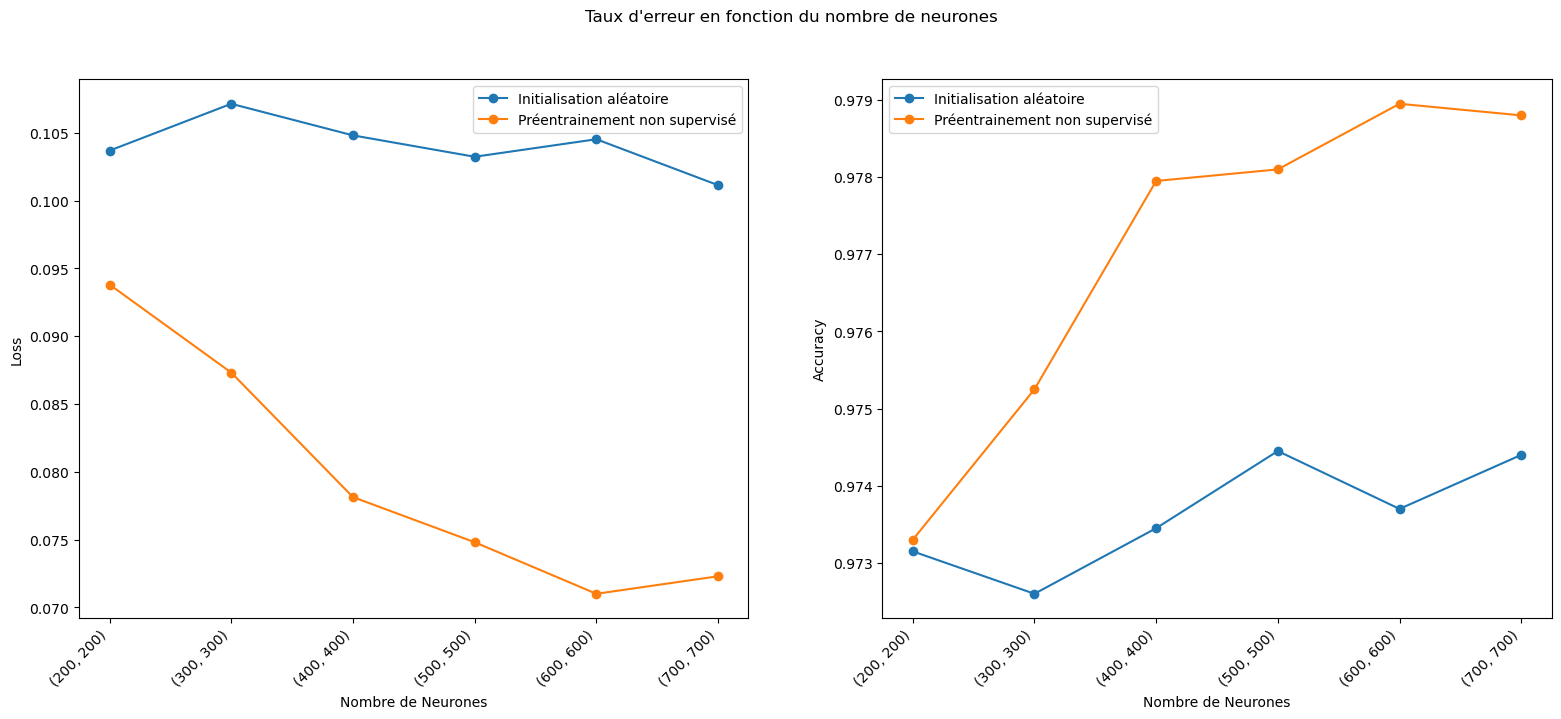

In [14]:
# Plot the result
X_range = range(len(hidden_layer_units))

fig, axs = plt.subplots(1, 2, figsize=(19,7))
fig.suptitle("Taux d'erreur en fonction du nombre de neurones")

axs[0].plot(X_range, result["random_loss"],"o-", label='Initialisation aléatoire')
axs[0].plot(X_range, result["pretrain_loss"], "o-", label = "Préentrainement non supervisé")
axs[0].set_xlabel("Nombre de Neurones")
axs[0].set_ylabel("Loss")
axs[0].set_xticks(X_range)
axs[0].set_xticklabels(hidden_layer_units, rotation=45, ha="right")
axs[0].legend()

axs[1].plot(X_range, result["random_acc"], "o-", label='Initialisation aléatoire')
axs[1].plot(X_range, result["pretrain_acc"], "o-", label = "Préentrainement non supervisé")
axs[1].set_xlabel("Nombre de Neurones")
axs[1].set_ylabel("Accuracy")
axs[1].set_xticks(X_range)
axs[1].set_xticklabels(hidden_layer_units, rotation=45, ha="right")
axs[1].legend()

plt.show()


## TAUX D'ERREUR EN FONCTION DU NOMBRE DE DONNEES D'APPRENTISSAGE

In [16]:
# Initialize variables
hidden_units = (200, 200)
number_of_examples = [1000, 3000, 5000, 7000, 10000,30000,60000]
# Initialize empty lists to store training history for each configuration
result = {}
result["random_loss"] = []
result["pretrain_loss"] = []
result["random_acc"] = []
result["pretrain_acc"] = []

# Train DNN for different number of examples
for number in number_of_examples:
    print(f"number of examples : {number}")
    # Load MNIST digits data
    X_train, X_test, y_train, y_test  = get_mnist(train_size=number, test_size=10000)
    
    # Initialize DNN with given input dimension, hidden layer units, and number of classes at random
    dnn_random = init_DNN(input_dim, hidden_units, num_classes)
    
    # Pretrain DNN with given number of epochs, learning rate, and batch size
    dnn_pretrain = pretrain_DNN(init_DNN(input_dim, hidden_units, num_classes), X_train, epochs=num_epochs_pretraining, learning_rate=learning_rate, batch_size=batch_size)
    
    # Fine tune DNN random and pretrain with given number of epochs, learning rate, and batch size, and store training history
    print("Retropagation model random =====================================")
    dnn_random_tune, train_loss = retropropagation(dnn_random, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    print("Retropagation model pretrain =====================================")
    dnn_pretrain_tune, train_loss = retropropagation(dnn_pretrain, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    
    # Compute test loss and accuracy for each case   
    print("Test model pretrain =====================================")
    test_loss_pretrain, acc_test_pretrain = test_DNN(dnn_pretrain_tune, X_test, y_test)
    print("Test model random =====================================")
    test_loss_random, acc_test_random = test_DNN(dnn_random_tune, X_test, y_test)
    
    # Store the result
    result["random_loss"].append(test_loss_random)
    result["pretrain_loss"].append(test_loss_pretrain)
    result["random_acc"].append(acc_test_random)
    result["pretrain_acc"].append(acc_test_pretrain)


number of examples : 30000


Training RMB: 100%|██████████| 100/100 [05:22<00:00,  3.23s/it, loss pretraining=0.107]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [11:07<00:00,  3.34s/it, loss retropagation=0.00501]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [10:08<00:00,  3.04s/it, loss retropagation=0.0172]


Test model pretrain =====================================
Test loss: 0.1303058906318957, Acc. %: 96.5%
Test model random =====================================
Test loss: 0.15371131887189327, Acc. %: 96.21%
number of examples : 60000


Training RMB: 100%|██████████| 100/100 [10:31<00:00,  6.31s/it, loss pretraining=0.103]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [22:02<00:00,  6.61s/it, loss retropagation=0.00252]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [20:12<00:00,  6.06s/it, loss retropagation=0.0132]


Test model pretrain =====================================
Test loss: 0.08250662458197865, Acc. %: 97.63%
Test model random =====================================
Test loss: 0.0923416693257145, Acc. %: 97.63%


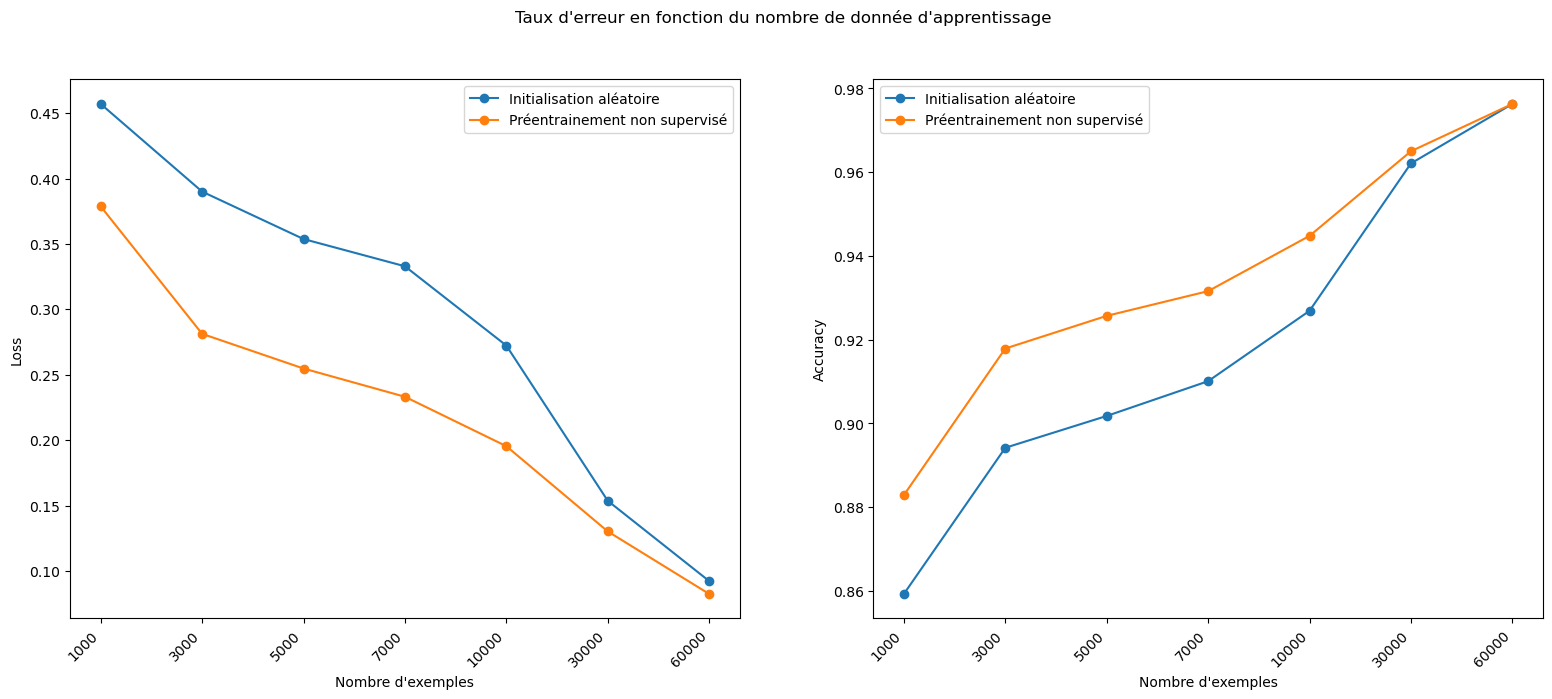

In [136]:
# Plot the result
X_range = range(len(number_of_examples))

fig, axs = plt.subplots(1, 2, figsize=(19,7))
fig.suptitle("Taux d'erreur en fonction du nombre de donnée d'apprentissage")


axs[0].plot(X_range, result["random_loss"],"o-", label='Initialisation aléatoire')
axs[0].plot(X_range, result["pretrain_loss"], "o-", label = "Préentrainement non supervisé")
axs[0].set_xlabel("Nombre d'exemples")
axs[0].set_ylabel("Loss")
axs[0].set_xticks(X_range)
axs[0].set_xticklabels(number_of_examples, rotation=45, ha="right")
axs[0].legend()

axs[1].plot(X_range, result["random_acc"], "o-", label='Initialisation aléatoire')
axs[1].plot(X_range, result["pretrain_acc"], "o-", label = "Préentrainement non supervisé")
axs[1].set_xlabel("Nombre d'exemples")
axs[1].set_ylabel("Accuracy")
axs[1].set_xticks(X_range)
axs[1].set_xticklabels(number_of_examples, rotation=45, ha="right")
axs[1].legend()

plt.show()
